# Data Science Challenge

In [2]:
# To install packages that are not installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages to import.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install pandas seaborn

In [77]:
# Libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Identification number for the flight.
`dep_stn` | Departure point.
`arr_stn` | Arrival point.
`ac_code` | Aircraft Code. 
`dep_date` | Scheduled departure date.	
`arr_date` | Scheduled arrival date.
`weather` | Observed weather conditions at departure.
`hobbs_meter` | The time in hours that an aircraft has been in use.
`year_man` | Year of manufacturer for the aircraft.
`dep_country` | Departure country.
`arr_country` | Destination country.
`delay` | Number of minutes a flight was delayed.

## Data Wrangling & Visualization

In [42]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [43]:
data

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,TU 0375,ALG,TUN,TU 32AIMG,2017-11-07 15:15:00,2017-11-07 16.25.00,rainy,5467,2004-08,Algeria,Tunisia,10.0
4996,TU 0216,TUN,IST,TU 320IMV,2017-11-07 16:00:00,2017-11-07 18.35.00,cloudy,4301,2004-08,Tunisia,Turkey,15.0
4997,TU 0701,ZRH,TUN,TU 32AIMH,2017-11-07 18:30:00,2017-11-07 20.40.00,windy,7437,2011-03,Switzerland,Tunisia,25.0
4998,TU 0712,CMN,TUN,TU 320IMV,2017-11-08 10:30:00,2017-11-08 12.55.00,stormy,4301,2004-08,Morocco,Tunisia,16.0


In [44]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


In [45]:
#Explore columns
data.columns

Index(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay'],
      dtype='object')

In [46]:
#Description
data.describe()

,hobbs_meter,delay
count,5000.000000,5000.00000
mean,6186.797000,20.51060
std,1693.004034,12.27381
min,3329.000000,2.00000
25%,4501.000000,10.00000
50%,6099.000000,18.00000
75%,7437.000000,30.00000
max,9137.000000,49.00000


In [47]:
#explore information about a Dataframe including the index dtytpr and columns, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5000 non-null   object 
 1   dep_stn      5000 non-null   object 
 2   arr_stn      5000 non-null   object 
 3   ac_code      5000 non-null   object 
 4   dep_date     5000 non-null   object 
 5   arr_date     5000 non-null   object 
 6   weather      5000 non-null   object 
 7   hobbs_meter  5000 non-null   int64  
 8   year_man     5000 non-null   object 
 9   dep_country  5000 non-null   object 
 10  arr_country  5000 non-null   object 
 11  delay        5000 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 468.9+ KB


In [48]:
#Converting the categorical column values to independent columns with values 0 and 1
data = pd.get_dummies(data,columns = ['weather'], drop_first= True)
data

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,hobbs_meter,year_man,dep_country,arr_country,delay,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,4390,2004-08,Tunisia,France,18.0,0,0,0,1,0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,5882,2010-01,Tunisia,Germany,39.0,0,1,0,0,0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,6117,2011-03,Tunisia,France,14.0,1,0,0,0,0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,8941,2010-01,France,Tunisia,25.0,0,0,0,1,0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,4301,2004-08,Tunisia,Switzerland,21.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,TU 0375,ALG,TUN,TU 32AIMG,2017-11-07 15:15:00,2017-11-07 16.25.00,5467,2004-08,Algeria,Tunisia,10.0,0,1,0,0,0
4996,TU 0216,TUN,IST,TU 320IMV,2017-11-07 16:00:00,2017-11-07 18.35.00,4301,2004-08,Tunisia,Turkey,15.0,0,0,0,0,0
4997,TU 0701,ZRH,TUN,TU 32AIMH,2017-11-07 18:30:00,2017-11-07 20.40.00,7437,2011-03,Switzerland,Tunisia,25.0,0,0,0,0,1
4998,TU 0712,CMN,TUN,TU 320IMV,2017-11-08 10:30:00,2017-11-08 12.55.00,4301,2004-08,Morocco,Tunisia,16.0,0,0,1,0,0


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


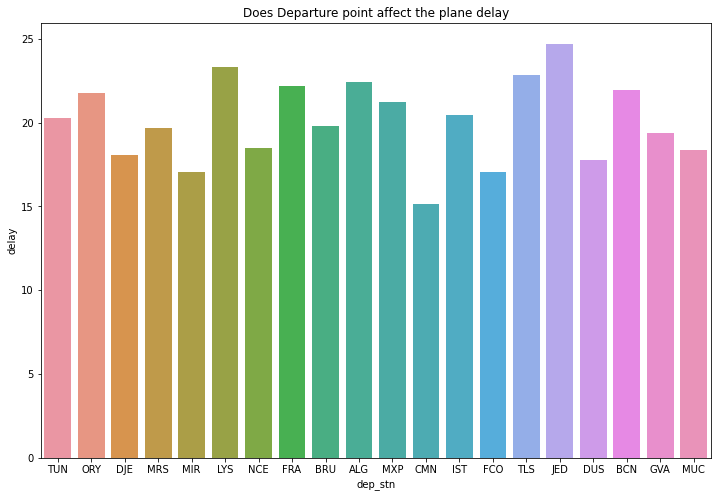

In [110]:
# Does Departure point affect the plane delay?
Plane_counts = data['dep_stn'].value_counts()
Plane_counts.index = [item for item in Plane_counts.index]
commonPlane = Plane_counts.iloc[:20].index
train_group = data.groupby('dep_stn')

train_mean_y = train_group['delay'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize=(12, 8)) 
sns.barplot([it for it in commonPlane], train_mean_y.loc[commonPlane].values[:,0])
plt.xlabel('dep_stn')
plt.ylabel('delay')
plt.title('Does Departure point affect the plane delay')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


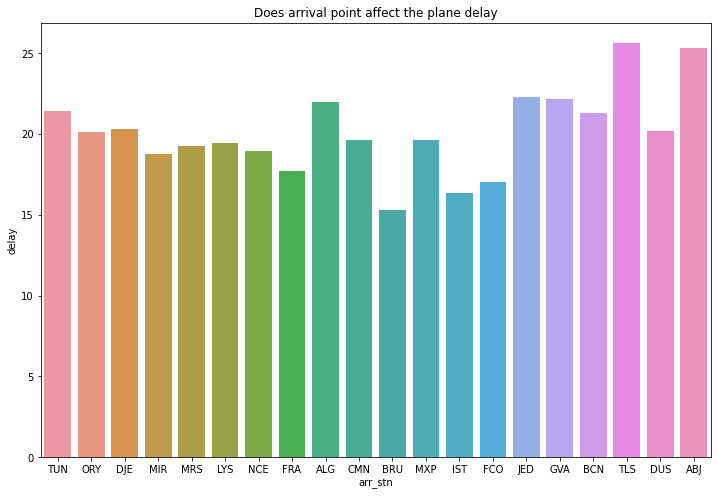

In [111]:
# Does Arrival point affect the plane delay?
Plane_counts = data['arr_stn'].value_counts()
Plane_counts.index = [item for item in Plane_counts.index]
commonPlane = Plane_counts.iloc[:20].index
train_group = data.groupby('arr_stn')

train_mean_y = train_group['delay'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize=(12, 8)) 
sns.barplot([it for it in commonPlane], train_mean_y.loc[commonPlane].values[:,0])
plt.xlabel('arr_stn')
plt.ylabel('delay')
plt.title('Does arrival point affect the plane delay')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


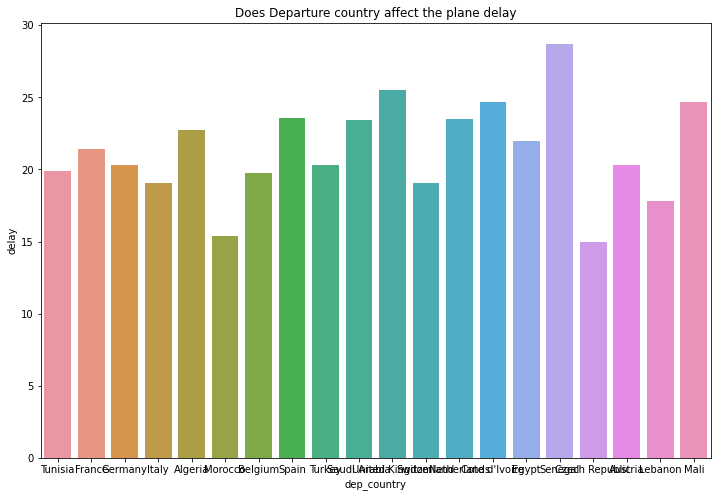

In [112]:
# Does Departure country affect the plane delay?
Plane_counts = data['dep_country'].value_counts()
Plane_counts.index = [item for item in Plane_counts.index]
commonPlane = Plane_counts.iloc[:20].index
train_group = data.groupby('dep_country')

train_mean_y = train_group['delay'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize=(12, 8)) 
sns.barplot([it for it in commonPlane], train_mean_y.loc[commonPlane].values[:,0])
plt.xlabel('dep_country')
plt.ylabel('delay')
plt.title('Does Departure country affect the plane delay')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


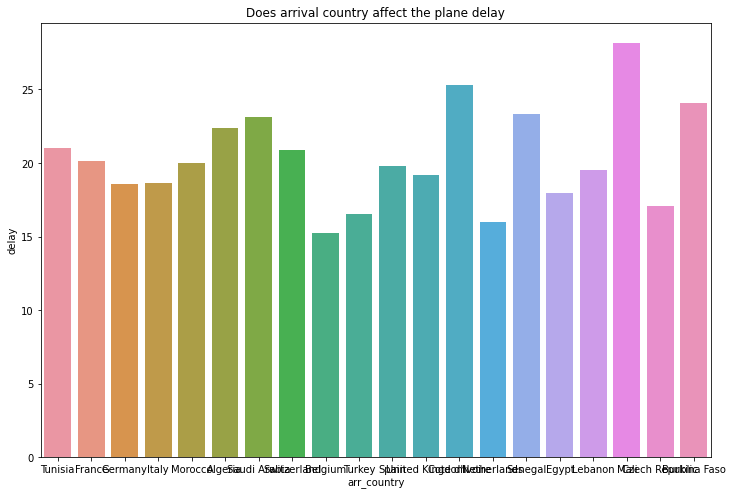

In [113]:
# Does Arrival country affect the plane delay?
Plane_counts = data['arr_country'].value_counts()
Plane_counts.index = [item for item in Plane_counts.index]
commonPlane = Plane_counts.iloc[:20].index
train_group = data.groupby('arr_country')

train_mean_y = train_group['delay'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize=(12, 8)) 
sns.barplot([it for it in commonPlane], train_mean_y.loc[commonPlane].values[:,0])
plt.xlabel('arr_country')
plt.ylabel('delay')
plt.title('Does arrival country affect the plane delay')
plt.show()

From the previous figures, we could see that the departure and arrival point/country does not affect the time of delay.

In [49]:
# Change the Year of manufacturer for the aircraft to the month difference from 10/2022
for i in range(len(data)):
    date = data.loc[i, 'year_man']
    date_list = date.split('-')
    diff = (2022-int(date_list[0]))*12+(10-int(date_list[1]))
    data.loc[i, 'date_man_diff'] = diff

In [65]:
# removing non-relevant fields - these may not be usefull for model training
train_data = data.drop(['year_man', 'id', 'ac_code', 'dep_date', 'arr_date', 'dep_stn', 'arr_stn', 'dep_country', 'arr_country'], axis=1)

In [66]:
train_data

,hobbs_meter,delay,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy,date_man_diff
0,4390,18.0,0,0,0,1,0,218.0
1,5882,39.0,0,1,0,0,0,153.0
2,6117,14.0,1,0,0,0,0,139.0
3,8941,25.0,0,0,0,1,0,153.0
4,4301,21.0,0,0,1,0,0,218.0
...,...,...,...,...,...,...,...,...
4995,5467,10.0,0,1,0,0,0,218.0
4996,4301,15.0,0,0,0,0,0,218.0
4997,7437,25.0,0,0,0,0,1,139.0
4998,4301,16.0,0,0,1,0,0,218.0


## Visualization, Modeling, Machine Learning

Build a regression model to predict how many minutes a flight will be delayed. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on mean absolute percent error.**
- **Read the test.csv file and prepare features for testing.**

In [55]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           3000 non-null   object
 1   dep_stn      3000 non-null   object
 2   arr_stn      3000 non-null   object
 3   ac_code      3000 non-null   object
 4   dep_date     3000 non-null   object
 5   arr_date     3000 non-null   object
 6   weather      3000 non-null   object
 7   hobbs_meter  3000 non-null   int64 
 8   year_man     3000 non-null   object
 9   dep_country  3000 non-null   object
 10  arr_country  3000 non-null   object
dtypes: int64(1), object(10)
memory usage: 257.9+ KB


In [57]:
#Description
test_data.describe()

,hobbs_meter
count,3000.000000
mean,6212.106000
std,1634.750039
min,3329.000000
25%,4501.000000
50%,6099.000000
75%,7437.000000
max,9201.000000


In [58]:
#Converting the categorical column values to independent columns with values 0 and 1
test_data = pd.get_dummies(test_data,columns = ['weather'], drop_first= True)
test_data

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,hobbs_meter,year_man,dep_country,arr_country,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,4301,2004-08,Tunisia,Turkey,0,0,1,0,0
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,6117,2011-03,Germany,Tunisia,0,0,1,0,0
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,7437,2011-03,Germany,Tunisia,1,0,0,0,0
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,8941,2010-01,Tunisia,Tunisia,1,0,0,0,0
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,8941,2010-01,Tunisia,Turkey,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TU 0635,ORY,DJE,TU 736IOK,2018-12-31 10:15:00,2018-12-31 13.05.00,6099,2003-02,France,Tunisia,0,0,0,0,1
2996,TU 0282,TUN,TLS,TU 32AIMH,2018-12-31 13:40:00,2018-12-31 15.35.00,7437,2011-03,Tunisia,France,1,0,0,0,0
2997,TU 6648,DJE,FRA,TU 736IOQ,2018-12-31 14:50:00,2018-12-31 17.50.00,5882,2010-01,Tunisia,Germany,1,0,0,0,0
2998,TU 0283,TLS,TUN,TU 32AIMH,2018-12-31 16:25:00,2018-12-31 18.15.00,7437,2011-03,France,Tunisia,0,0,0,0,1


In [59]:
for i in range(len(test_data)):
    date = test_data.loc[i, 'year_man']
    date_list = date.split('-')
    diff = (2022-int(date_list[0]))*12+(10-int(date_list[1]))
    test_data.loc[i, 'date_man_diff'] = diff

In [67]:
# removing non-relevant fields - these may not be usefull for model training
test_data_feature = test_data.drop(['year_man', 'id', 'ac_code', 'dep_date', 'arr_date', 'dep_stn', 'arr_stn', 'dep_country', 'arr_country'], axis=1)

In [68]:
test_data_feature

,hobbs_meter,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy,date_man_diff
0,4301,0,0,1,0,0,218.0
1,6117,0,0,1,0,0,139.0
2,7437,1,0,0,0,0,139.0
3,8941,1,0,0,0,0,153.0
4,8941,1,0,0,0,0,153.0
...,...,...,...,...,...,...,...
2995,6099,0,0,0,0,1,236.0
2996,7437,1,0,0,0,0,139.0
2997,5882,1,0,0,0,0,153.0
2998,7437,0,0,0,0,1,139.0


**Describe the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**

In [74]:
#Checking the correlation between features
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = train_data.corr()
corr_df

,hobbs_meter,delay,weather_foggy,weather_rainy,weather_stormy,weather_sunny,weather_windy,date_man_diff
hobbs_meter,1.000000,-0.042016,-0.030393,-0.007962,-0.010621,-0.020925,0.060042,-0.182191
delay,-0.042016,1.000000,0.025351,-0.026908,-0.000046,-0.016749,0.036692,0.000918
weather_foggy,-0.030393,0.025351,1.000000,-0.204528,-0.197830,-0.202643,-0.198854,0.009997
weather_rainy,-0.007962,-0.026908,-0.204528,1.000000,-0.198392,-0.203219,-0.199420,-0.012130
weather_stormy,-0.010621,-0.000046,-0.197830,-0.198392,1.000000,-0.196564,-0.192889,0.025072
weather_sunny,-0.020925,-0.016749,-0.202643,-0.203219,-0.196564,1.000000,-0.197581,-0.000908
weather_windy,0.060042,0.036692,-0.198854,-0.199420,-0.192889,-0.197581,1.000000,-0.026585
date_man_diff,-0.182191,0.000918,0.009997,-0.012130,0.025072,-0.000908,-0.026585,1.000000


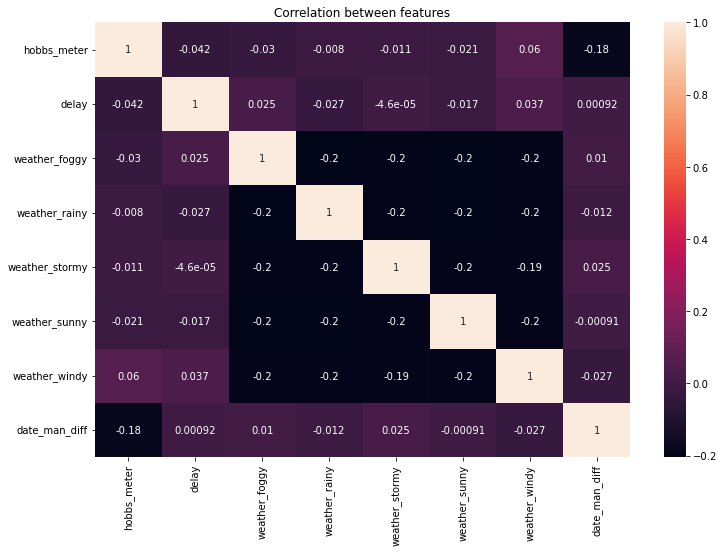

In [80]:
plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(corr_df, ax=ax, annot = True)
ax.set_title('Correlation between features')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'delay'),
  Text(1, 0, 'weather_windy'),
  Text(2, 0, 'weather_foggy'),
  Text(3, 0, 'date_man_diff'),
  Text(4, 0, 'weather_stormy'),
  Text(5, 0, 'weather_sunny'),
  Text(6, 0, 'weather_rainy'),
  Text(7, 0, 'hobbs_meter')])

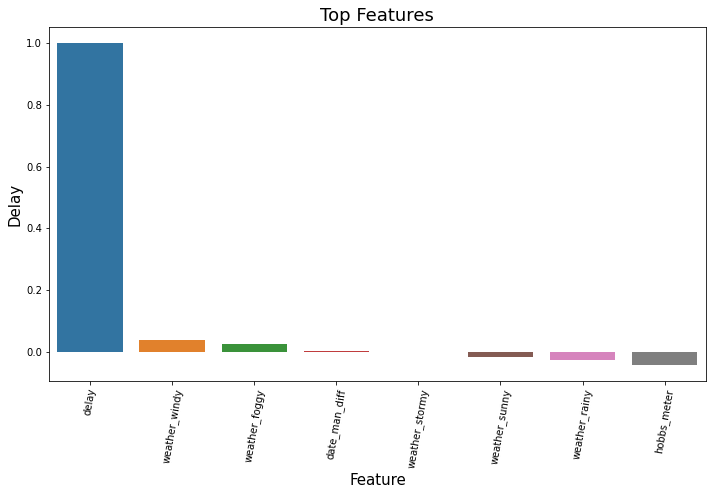

In [82]:
# Highlight the most important features of the model for the management

corr_df_viz = corr_df
corr_df_viz['feature'] = corr_df_viz.index

plt.figure(figsize=(10,6))
sns.barplot(x = 'feature',
            y = 'delay',
            data = corr_df_viz,
            order = corr_df_viz.sort_values('delay', ascending=False).feature)
#set labels
plt.xlabel("Feature", size = 15)
plt.ylabel("Delay", size = 15)
plt.title("Top Features", size=18)
plt.tight_layout()
plt.xticks(rotation= 80)

The above Graph shows us that the windy, foggy and date_man_diff are positively correlated whereas features like stormy, sunny, rainly, hobbs_meter are negatively correlated

## Creating Model

## XGBoost Regression

In [94]:
import xgboost as xg
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
np.set_printoptions(threshold=np.inf)

In [89]:
# Split the data to train and test
np.random.seed(42)
X= train_data.drop(['delay'], axis = 1)
y = train_data['delay']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xg.XGBRegressor(eval_metric='mape')

In [100]:
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pa

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [101]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='mape')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='mape', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
# use the model to predict the delay for the test data
predictions = regressor.predict(X_test)

In [104]:
## Mean Absolute Percentage Eerror
mape = mean_absolute_percentage_error(y_test, pred)
print("MAPE: % f" %(mape))

MAPE:  0.830621


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict how many minutes a flight will be delayed. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **delay**

In [114]:
# Combining prediction results to IDs
pred_list = list(regressor.predict(test_data_feature))
pred_id = list(test_data['id'])
submission_df = pd.DataFrame(list(zip(pred_id, pred_list)), columns = ['id', 'delay'])

/opt/conda/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [115]:
submission_df

,id,delay
0,TU 0216,21.009148
1,TU 0543,22.703802
2,TU 0527,21.792362
3,UG 0011,22.467289
4,TU 0214,22.467289
...,...,...
2995,TU 0635,18.932093
2996,TU 0282,21.792362
2997,TU 6648,20.672581
2998,TU 0283,18.772587


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)